<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

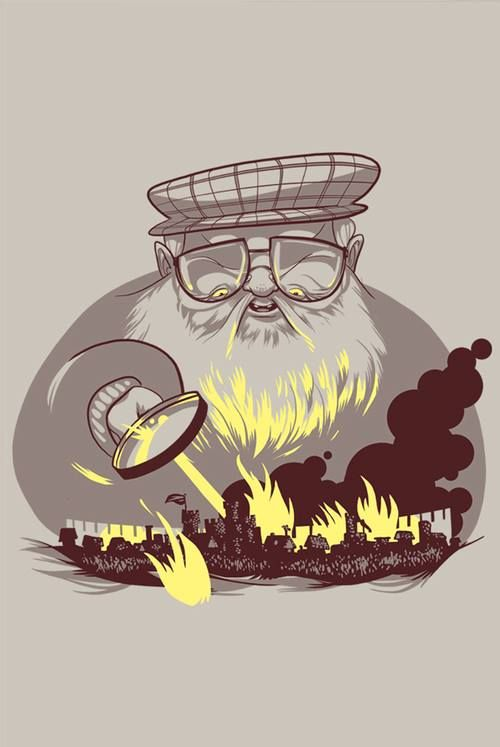

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [712]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 37.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 4.24MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [713]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [714]:
data = pd.read_csv("/content/game_of_thrones_train.csv", index_col="S.No")
data_test = pd.read_csv("/content/game_of_thrones_test.csv", index_col="S.No")

In [715]:
print(f"Размерность треин: {data.shape}")
print(f"Размерность тест: {data_test.shape}")

Размерность треин: (1557, 25)
Размерность тест: (389, 24)


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [716]:
'''Пропуски'''
data.isna().sum()

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


In [717]:
'''Количество уникальных значений'''
data.nunique()

,0
name,1557
title,195
male,2
culture,51
dateOfBirth,105
mother,16
father,19
heir,20
house,315
spouse,186


In [718]:
'''Удалим колонки, где много пропусков'''

cols_to_del = ["mother", "father", "heir", "spouse", "isAliveMother", "isAliveFather", "isAliveHeir", "isAliveSpouse"]
data = data.drop(columns=cols_to_del)
data_test = data_test.drop(columns=cols_to_del)

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [719]:
'''isPopular и boolDeadRelations'''
data["isPopular"] = np.where(data["popularity"] >= 0.5, 1, 0)
data["boolDeadRelations"] = np.where(data["numDeadRelations"] == 0, 0, 1)

data_test["isPopular"] = np.where(data_test["popularity"] >= 0.5, 1, 0)
data_test["boolDeadRelations"] = np.where(data_test["numDeadRelations"] == 0, 0, 1)

'''title если пропуск то 0, если нет то 1'''
data["title"] = np.where(data["title"].isna(), 0, 1)
data_test["title"] = np.where(data_test["title"].isna(), 0, 1)

'''Дропнем исходные колонки'''
data.drop(columns=["numDeadRelations", "popularity"], inplace=True)
data_test.drop(columns=["numDeadRelations", "popularity"], inplace=True)

In [720]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles', 'Summer Islander','Summer Islands', 'Summer Isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis', 'Ghiscaricari'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni', 'Lhazareen', 'Lhazarene'],
    'Andal': ['andal', 'andals', 'Andals'],
    'Braavosi': ['braavosi', 'braavos', 'Braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish', 'Dornishmen', 'Dorne'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands', 'Westermen', 'Westerman', 'westeros', 'westerosi', 'Westeros', 'Westerosi', 'Westerlands'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen', 'Northern mountain clans'],
    'Free Folk': ['wildling', 'first men', 'free folk', 'Free folk', 'Free Folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
    'Iron': ['ironborn', 'Ironmen', 'Ironborn'],
    'Vale': ['Valemen', 'Vale', 'Vale mountain clans']
}

'''Переворачиваем словарь'''
new_titles = {}
for key, values in cult.items():
    for val in values:
        new_titles[val] = key

'''Группируем значения в culture, если null, то other'''
data["culture"] = data["culture"].apply(lambda x: new_titles.get(x, x) if pd.notnull(x) else "other")
data_test["culture"] = data_test["culture"].apply(lambda x: new_titles.get(x, x) if pd.notnull(x) else "other")

In [721]:
'''Там где в house есть summer islands, в culture напишем summer islands, по аналогии и braavosi (я смотрел уникальные
значения и понял что есть общие названия)'''
data['house'] = np.where(data['culture'] == 'Summer Islands', 'Summer Islands', data['house'])
data['house'] = np.where(data['culture'] == 'Braavosi', 'Iron Bank of Braavos', data['house'])

data_test['house'] = np.where(data_test['culture'] == 'Summer Islands', 'Summer Islands', data_test['house'])
data_test['house'] = np.where(data_test['culture'] == 'Braavosi', 'Iron Bank of Braavos', data_test['house'])

'''то же самое наоборот'''
data['culture'] = np.where(data['house'] == 'Summer Islands', 'Summer Islands', data['culture'])
data['culture'] = np.where(data['house'] == 'Iron Bank of Braavos', 'Braavosi', data['culture'])

data_test['culture'] = np.where(data_test['house'] == 'Summer Islands', 'Summer Islands', data_test['culture'])
data_test['culture'] = np.where(data_test['house'] == 'Iron Bank of Braavos', 'Braavosi', data_test['culture'])

In [722]:
'''Если в обоих столбцах age и dateofbirth не пропуск и сумма age и dateofbirth = 305, то он жив (это логично)'''
data['isSum'] = np.where(data['age'].isna() & data['dateOfBirth'].isna(), -1, np.where(data['age'] + data['dateOfBirth'] == 305, 1, 0))
data_test['isSum'] = np.where(data_test['age'].isna() & data_test['dateOfBirth'].isna(), -1, np.where(data_test['age'] + data_test['dateOfBirth'] == 305, 1, 0))

In [723]:
data['isSum'].value_counts()

,count
isSum,
-1,1278
1,189
0,90


In [724]:
from sklearn.preprocessing import OneHotEncoder

'''делаем ohe для isSum'''
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(data[['isSum']])  # Обучаем на train

encoded_train = encoder.transform(data[['isSum']])
encoded_test = encoder.transform(data_test[['isSum']])

ohe_df_train = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(['isSum']))
ohe_df_test = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(['isSum']))

ohe_df_train.reset_index(drop=True, inplace=True)
ohe_df_train.index = range(1, len(ohe_df_train) + 1)

ohe_df_test.reset_index(drop=True, inplace=True)
ohe_df_test.index = range(1558, len(ohe_df_test) + 1558)

data = pd.concat([data, ohe_df_train], axis=1)
data_test = pd.concat([data_test, ohe_df_test], axis=1)

data.drop(columns=['isSum', 'isSum_-1'], inplace=True)
data_test.drop(columns=['isSum', 'isSum_-1'], inplace=True)

In [725]:
'''появлялся ли хотя бы в одной из трех последних книг'''
data["appear"] = np.where(data["book3"] + data['book4'] + data['book5'] == 0, 0, 1)
data_test["appear"] = np.where(data_test["book3"] + data_test['book4'] + data_test['book5'] == 0, 0, 1)

'''Дропнем исходные фичи'''
data.drop(columns=["book1", "book2", "book3", "book4", "book5"], inplace=True)
data_test.drop(columns=["book1", "book2", "book3", "book4", "book5"], inplace=True)

In [726]:
'''делаем ohe для culture'''
encoder.fit(data[['culture']])

encoded_train = encoder.transform(data[['culture']])
encoded_test = encoder.transform(data_test[['culture']])

ohe_df_train = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(['culture']))
ohe_df_test = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(['culture']))

ohe_df_train.reset_index(drop=True, inplace=True)
ohe_df_train.index = range(1, len(ohe_df_train) + 1)

ohe_df_test.reset_index(drop=True, inplace=True)
ohe_df_test.index = range(1558, len(ohe_df_test) + 1558)

data = pd.concat([data, ohe_df_train], axis=1)
data_test = pd.concat([data_test, ohe_df_test], axis=1)

data.drop(columns=['culture', 'culture_other'], inplace=True)
data_test.drop(columns=['culture', 'culture_other'], inplace=True)

In [727]:
'''Если герой принадлежит дому, то 1, если нет то 0'''
data['house'] = np.where(data['house'].isna(), 0, 1)
data_test['house'] = np.where(data_test['house'].isna(), 0, 1)

In [728]:
'''name я не придумал назначение, dateOfBirth больше не нужен'''
data.drop(columns=['name', 'dateOfBirth'], inplace=True)
data_test.drop(columns=['name', 'dateOfBirth'], inplace=True)

In [729]:
'''Обобщим колонку age'''
def age_preprocces(age):
    if age < 15:
        return "child"
    elif age >= 15 and age < 30:
        return "adult"
    elif age >= 30 and age < 60:
        return "more_adult"
    elif age >= 60:
        return "old"

data["age"] = data["age"].apply(lambda x: age_preprocces(x))
data_test["age"] = data_test["age"].apply(lambda x: age_preprocces(x))

In [730]:
'''Если колонка age пустая и он высокопоставленный ставим old, если не высокопост
то ставим adult (мода)'''
data["age"] = np.where(
    pd.isna(data["age"]),
    np.where(data["isNoble"] == 1, "old", "adult"),
    data["age"]
)
data_test["age"] = np.where(
    pd.isna(data_test["age"]),
    np.where(data_test["isNoble"] == 1, "old", "adult"),
    data_test["age"]
)

In [731]:
'''делаем ohe для age'''
encoder.fit(data[['age']])

encoded_train = encoder.transform(data[['age']])
encoded_test = encoder.transform(data_test[['age']])

ohe_df_train = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(['age']))
ohe_df_test = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(['age']))

ohe_df_train.reset_index(drop=True, inplace=True)
ohe_df_train.index = range(1, len(ohe_df_train) + 1)

ohe_df_test.reset_index(drop=True, inplace=True)
ohe_df_test.index = range(1558, len(ohe_df_test) + 1558)

data = pd.concat([data, ohe_df_train], axis=1)
data_test = pd.concat([data_test, ohe_df_test], axis=1)

data.drop(columns=['age', 'age_more_adult'], inplace=True)
data_test.drop(columns=['age', 'age_more_adult'], inplace=True)

In [732]:
data_test

,title,male,house,isMarried,isNoble,isPopular,boolDeadRelations,isSum_0,isSum_1,appear,...,culture_Stormlands,culture_Summer Islands,culture_Tyroshi,culture_Vale,culture_Valyrian,culture_Westermen,culture_Wildling,age_adult,age_child,age_old
1558,0,0,1,0,0,0,0,1.0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1559,0,0,1,0,0,1,0,0.0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1560,0,0,1,0,0,0,0,0.0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1561,1,1,1,0,1,0,0,0.0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1562,0,1,1,1,0,0,0,1.0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,0,1,1,0,0,0,0,0.0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1943,0,1,1,0,0,0,0,0.0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1944,0,1,0,0,0,0,0,0.0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1945,0,1,1,0,0,0,0,0.0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [733]:
'''Появился float, в инт преобразую'''
data = data.astype(int)
data_test = data_test.astype(int)

In [734]:
data

,title,male,house,isMarried,isNoble,isAlive,isPopular,boolDeadRelations,isSum_0,isSum_1,...,culture_Stormlands,culture_Summer Islands,culture_Tyroshi,culture_Vale,culture_Valyrian,culture_Westermen,culture_Wildling,age_adult,age_child,age_old
1,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1,1,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,1,0,1,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1554,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1555,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1556,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [735]:
#data.drop(columns=[...], inplace = True) удалил раньше

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

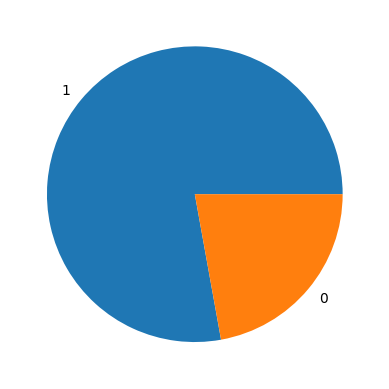

In [760]:
'''Целевая переменная - количественная
проанализируем по балансу классов
видно, что больше 75% всех персонажей живы'''

plt.pie(data['isAlive'].value_counts(), labels=data['isAlive'].value_counts().index)
plt.show()

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

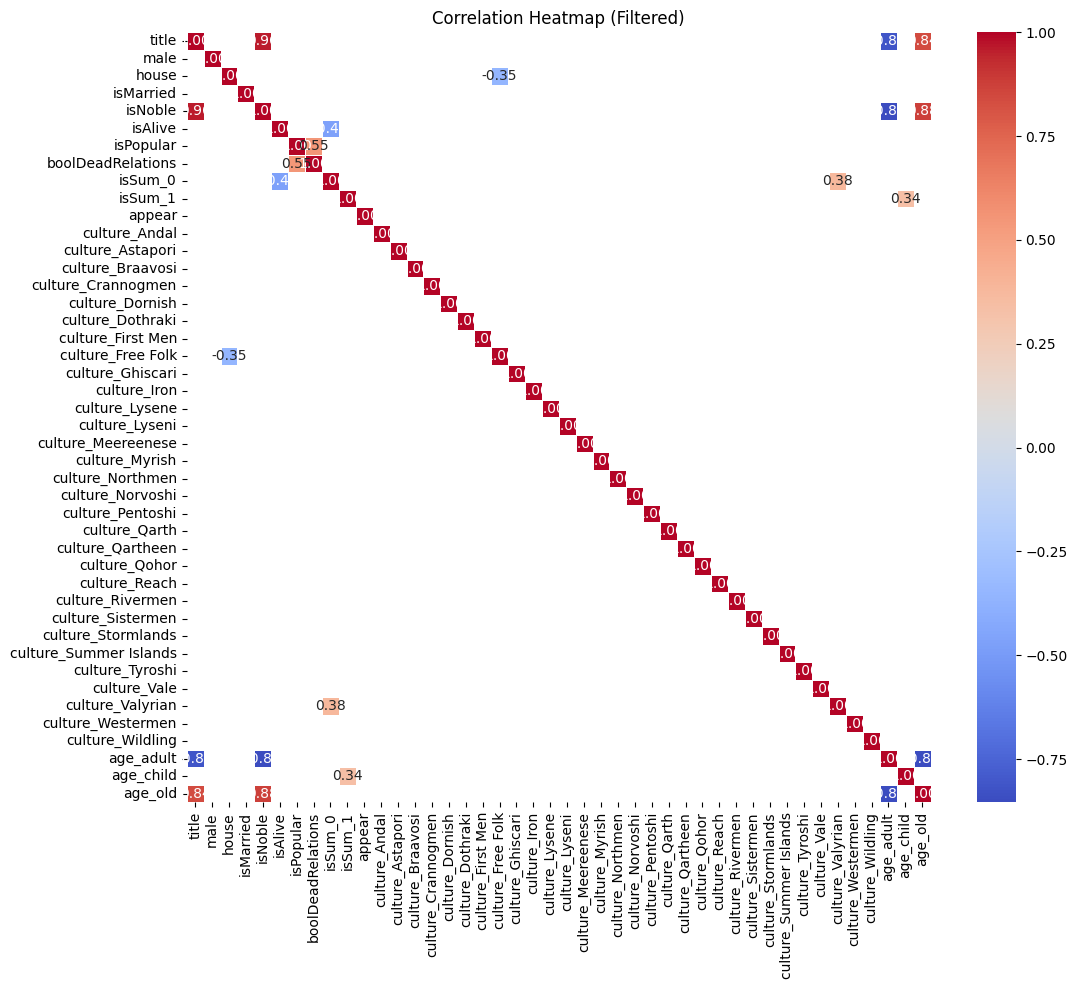

In [762]:
corr_matrix = data.corr()

# Создаем маску для скрытия слабых корреляций
mask = abs(corr_matrix) < 0.3  # Здесь фильтр на |corr| < 0.3

# Визуализация
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.title("Correlation Heatmap (Filtered)")
plt.show()
'''isNoble и title очень скоррелированы, age_old и isNoble, age_adult и isNoble обратно скоррелированы'''

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [736]:
'''Посмотрим на корреляцию признаков на целевую
видим, что новые фичи appear и isSum, isPopular, boolDeadRelations достаточно хорошо скореллированы с таргетом'''
correlation = data.corr()
print(correlation['isAlive'].sort_values(ascending=False))

isAlive                   1.000000
appear                    0.220504
isSum_1                   0.198311
culture_Braavosi          0.076861
culture_Iron              0.064933
culture_Dornish           0.048977
age_adult                 0.041051
culture_Summer Islands    0.033184
culture_Ghiscari          0.028766
culture_Stormlands        0.027077
culture_Vale              0.026873
culture_Crannogmen        0.019134
culture_Andal             0.019134
culture_First Men         0.019134
culture_Wildling          0.013526
culture_Qohor             0.013526
culture_Lyseni            0.013526
culture_Qarth             0.013526
culture_Norvoshi          0.013526
culture_Qartheen          0.002949
culture_Reach            -0.002030
culture_Northmen         -0.003147
culture_Lysene           -0.003473
house                    -0.003739
age_old                  -0.010395
culture_Rivermen         -0.015181
culture_Tyroshi          -0.016736
culture_Dothraki         -0.018351
age_child           

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [737]:
'''разделю train на фичи и таргет'''
X = data.drop(columns=["isAlive"])
y = data["isAlive"]

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [738]:
from sklearn.model_selection import train_test_split

In [739]:
'''делим train на train и тест (validation)'''
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=48)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [740]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [741]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [ ]:
from sklearn.metrics import accuracy_score

# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1, penalty='l2')

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных (валидации)
y_pred = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [743]:
# Шаг 1. создание модели
random_forest = RandomForestClassifier()

# Шаг 2. обучение модели
random_forest.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных (валидации)
rf_pred = random_forest.predict(X_test)

In [744]:
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train, y_train)
ada_pred = ada_boost.predict(X_test)

In [745]:
gaussian_process = GaussianProcessClassifier()
gaussian_process.fit(X_train, y_train)
gpc_pred = gaussian_process.predict(X_test)

In [746]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)
gnb_pred = gaussian_nb.predict(X_test)

In [747]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [748]:
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

In [749]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
dt_pred = decision_tree.predict(X_test)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [750]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [751]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8526


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [752]:
# Шаг 3. Предсказание на тестовых данных
y_pred_rf = random_forest.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Шаг 4. Оценка предсказания по метрике accuracy

print("Random Forest Accuracy: %.4f" % rf_accuracy)

Random Forest Accuracy: 0.8440


In [753]:
# AdaBoostClassifier
y_pred_ada = ada_boost.predict(X_test)
ada_accuracy = accuracy_score(y_test, y_pred_ada)
print("AdaBoost Accuracy: %.4f" % ada_accuracy)

AdaBoost Accuracy: 0.8547


In [754]:
# GaussianProcessClassifier
y_pred_gpc = gaussian_process.predict(X_test)
gpc_accuracy = accuracy_score(y_test, y_pred_gpc)
print("Gaussian Process Classifier Accuracy: %.4f" % gpc_accuracy)

Gaussian Process Classifier Accuracy: 0.8547


In [755]:
# GaussianNB
y_pred_gnb = gaussian_nb.predict(X_test)
gnb_accuracy = accuracy_score(y_test, y_pred_gnb)
print("GaussianNB Accuracy: %.4f" % gnb_accuracy)

GaussianNB Accuracy: 0.3953


In [756]:
# KNeighborsClassifier
y_pred_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("KNeighborsClassifier Accuracy: %.4f" % knn_accuracy)

KNeighborsClassifier Accuracy: 0.8184


In [757]:
y_pred_svc = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test, y_pred_svc)
print("SVC Accuracy: %.4f" % svc_accuracy)

SVC Accuracy: 0.8547


In [758]:
y_pred_dt = decision_tree.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy: %.4f" % dt_accuracy)

Decision Tree Accuracy: 0.8355


Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [413]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 11.7MB/s]


In [705]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [706]:
data_test

,title,male,isNoble,isPopular,boolDeadRelations,isSum_0,isSum_1,appear,culture_Astapori,culture_Braavosi,culture_Iron,culture_Valyrian,culture_Westermen
1558,0,0,0,0,0,1,0,1,0,0,0,0,0
1559,0,0,0,1,0,0,0,1,0,0,0,0,0
1560,0,0,0,0,0,0,0,1,0,0,0,0,0
1561,1,1,1,0,0,0,0,1,0,0,0,0,0
1562,0,1,0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,0,1,0,0,0,0,0,1,0,0,0,0,1
1943,0,1,0,0,0,0,0,1,0,0,0,0,0
1944,0,1,0,0,0,0,0,1,0,0,0,0,0
1945,0,1,0,0,0,0,0,1,0,0,0,0,0


In [416]:
y_pred_ada = ada_boost.predict(data_test)
'''выбрал ada boost как лучшую по accuracy и получил 0.8 на тесте'''

In [708]:
submission["isAlive"] = y_pred_svc

In [709]:
submission

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,0
...,...
1942,1
1943,1
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [711]:
submission.to_csv("/content/new_submission.csv", index=False)